# Gráficos padronizados em ggplot2
## Bibliotecas


In [79]:
loadlibrary <- function(x)
  {
    if (!require(x,character.only = TRUE))
    {
      install.packages(x, repos='http://cran.us.r-project.org', dep=TRUE)
        if(!require(x,character.only = TRUE)) stop("Package not found")
    }
  }
    
loadlibrary("ggplot2")
loadlibrary("scales")
loadlibrary("reshape")


## Plotagem de gráficos de linhas

In [80]:
plot.series <- function(series, label_series=" ", label_x="x", label_y="y", colors=NULL) {
  grf <- ggplot(data=series, aes(x = x, y = value, colour=variable))
  grf <- grf + geom_line() + geom_point(data=series, aes(x = x, y = value, colour=variable), size=0.5)
  if (!is.null(colors)) {
    grf <- grf + scale_color_manual(values=colors)
  }
  grf <- grf + labs(color=label_series)
  grf <- grf + xlab(label_x)
  grf <- grf + ylab(label_y) 
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.major = element_blank()) + theme(panel.grid.minor = element_blank()) 
  grf <- grf + theme(legend.position = "bottom") + theme(legend.key = element_blank()) 
  return(grf)
}

## Plotagem de gráficos boxplot

In [81]:
plot.boxplot <- function(series, labx = "x", laby = "y", colors = NULL) {
  grf <- ggplot(aes(y = value, x = variable), data = series)
  if (!is.null(colors)) {
    grf <- grf + geom_boxplot(color = colors)
  }
  else {
    grf <- grf + geom_boxplot()
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + xlab(labx)
  grf <- grf + ylab(laby)
  return(grf)
}

## Plotagem de gráficos de barra

In [82]:
plot.bar <- function(series, group=FALSE, colors=NULL) {
  if (group) {
    grf <- ggplot(series, aes(x, value, fill=variable)) + geom_bar(stat = "identity",position = "dodge")
    if (!is.null(colors)) {
      grf <- grf + scale_fill_manual("legend", values = colors)
    }
  }
  else {  
    grf <- ggplot(series, aes(variable, value))
    if (!is.null(colors)) {
      grf <- grf + geom_bar(stat = "identity",fill=colors)
    }
    else {  
      grf <- grf + geom_bar(stat = "identity")
    }    
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$x))
  return(grf)
}

## Plotagem de gráficos de stacked-bar

In [83]:
plot.stackedbar <- function(series, colors=NULL) {
  grf <- ggplot(series, aes(x=x, y=value, fill=variable)) + geom_bar(stat="identity", colour="white")
  if (!is.null(colors)) {
    grf <- grf + scale_fill_manual("legend", values = colors)
  }
  grf <- grf + theme_bw(base_size = 10)
  grf <- grf + theme(panel.grid.minor = element_blank()) + theme(legend.position = "bottom")
  grf <- grf + scale_x_discrete(limits = unique(series$x))
  return(grf)
}

## Datasets de exemplos

In [84]:
library(reshape)

dataset_series <- function() {
  series <- data.frame(x= 1:10, sin=sin(1:10), cos=cos(1:10))
  series <- melt(series[,c('x','sin','cos')],id.vars = 1)
  return(series)  
}

dataset_bar <- function() {
  series <- matrix(nrow=5, ncol=2)
  series[1,] = c("janeiro", 10)
  series[2,] = c("fevereiro", 9)
  series[3,] = c("março", 11)
  series[4,] = c("abril", 8)
  series[5,] = c("maio", 12)
  series <- data.frame(variable=as.factor(series[,1]), value=as.double(series[,2]))  
  return(series)
}

dataset_stackedbar <- function() {
  series <- read.table(text = "x Map Reduce 
                          janeiro 10 5
                          fevereiro 9 4
                          março 11 5
                          abril 8 4
                          maio 12 6",header = TRUE,sep = "")  
  series <- melt(series[,c('x','Map','Reduce')],id.vars = 1)
}


## Exemplos

Produção de gráficos de linhas. O dataset precisa ter os seguintes atributos: $x$ (eixo x), $variable$ (série) e $value$ (valores). 

A função $dataset\_series()$ disponibilizada neste exemplo tem os metadados necessários para a produção deste gráfico. 

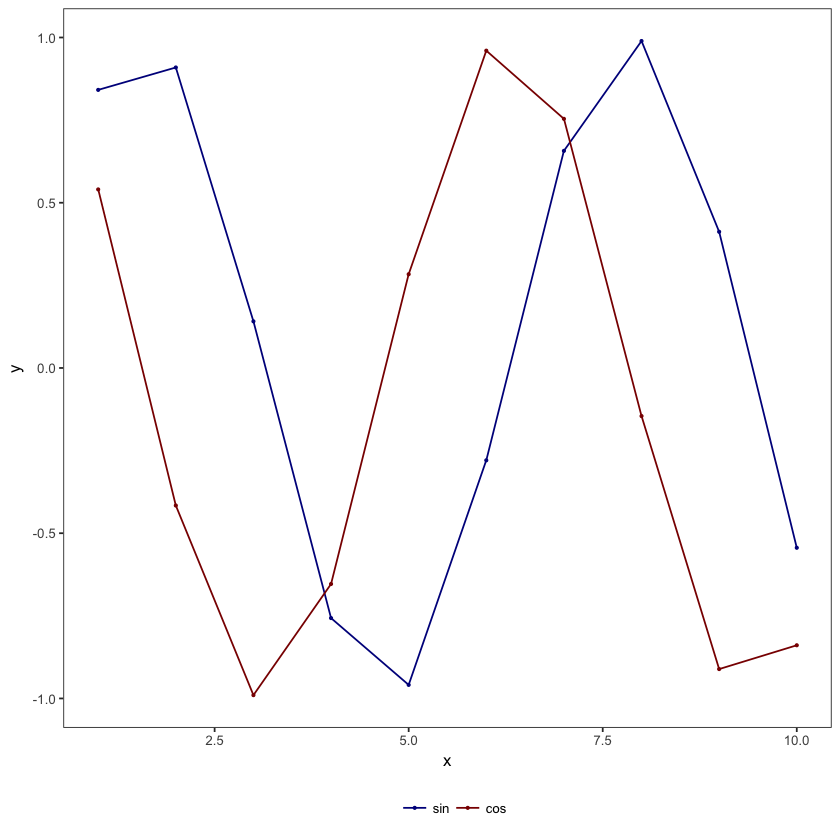

In [85]:
mycolors=c("darkblue", "darkred", "darkgreen", "orange", "purple")

series <- dataset_series()
grf <- plot.series(series,colors=mycolors)
grf

Produção de gráficos de boxplot. O dataset precisa ter os seguintes atributos: $x$ (eixo x), $variable$ (barra) e $value$ (valores). 

A função $dataset\_series()$ disponibilizada neste exemplo tem os metadados necessários para a produção deste gráfico. 

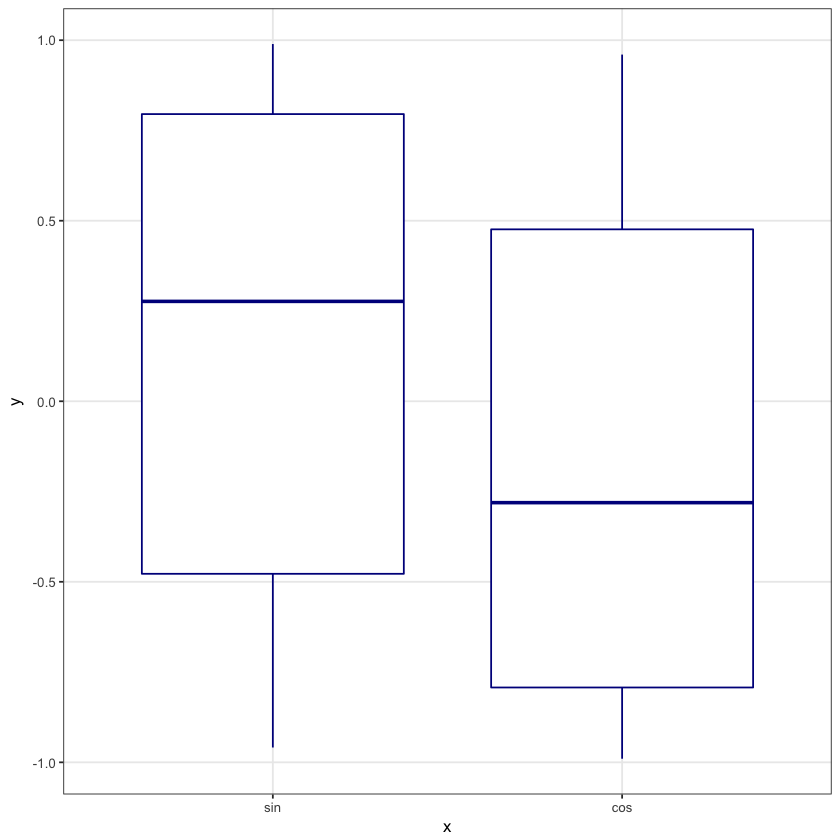

In [86]:
series <- dataset_series()
grf <- plot.boxplot(series, colors=mycolors[1])
grf

Produção de gráficos de barras simples. O dataset precisa ter os seguintes atributos: $x$ (eixo x) e $value$ (valores). 

A função $dataset\_bar()$ disponibilizada neste exemplo tem os metadados necessários para a produção deste gráfico. 

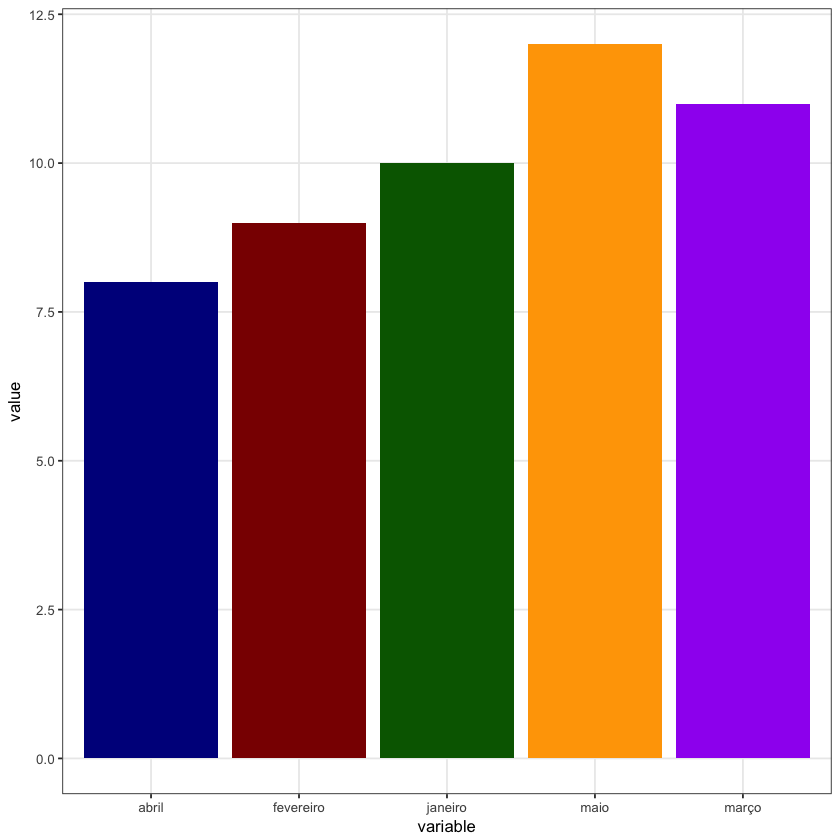

In [87]:
series <- dataset_bar()
grf <- plot.bar(series, colors=mycolors)
grf


Produção de gráficos de barras lado a lado. O dataset precisa ter os seguintes atributos: $x$ (eixo x), $variable$ (colunas) e $value$ (valores). 

A função $dataset\_stackedbar()$ disponibilizada neste exemplo tem os metadados necessários para a produção deste gráfico. 

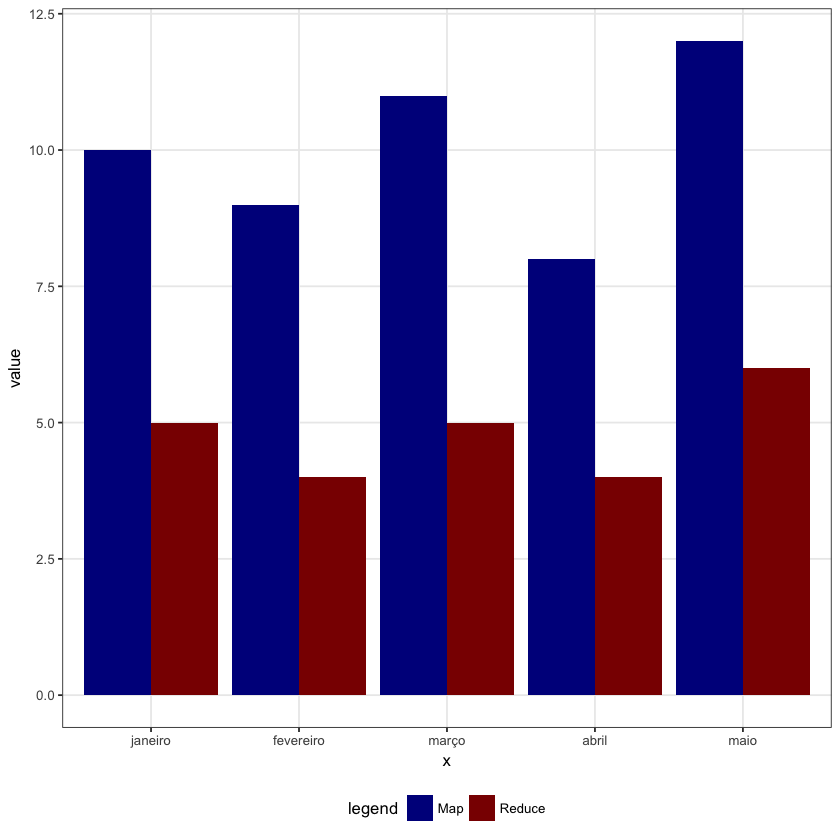

In [88]:
series <- dataset_stackedbar()
grf <- plot.bar(series, group=TRUE, colors=mycolors)
grf


Produção de gráficos de pilha. O dataset precisa ter os seguintes atributos: $x$ (eixo x), $variable$ (colunas) e $value$ (valores). 

A função $dataset\_stackedbar()$ disponibilizada neste exemplo tem os metadados necessários para a produção deste gráfico. 

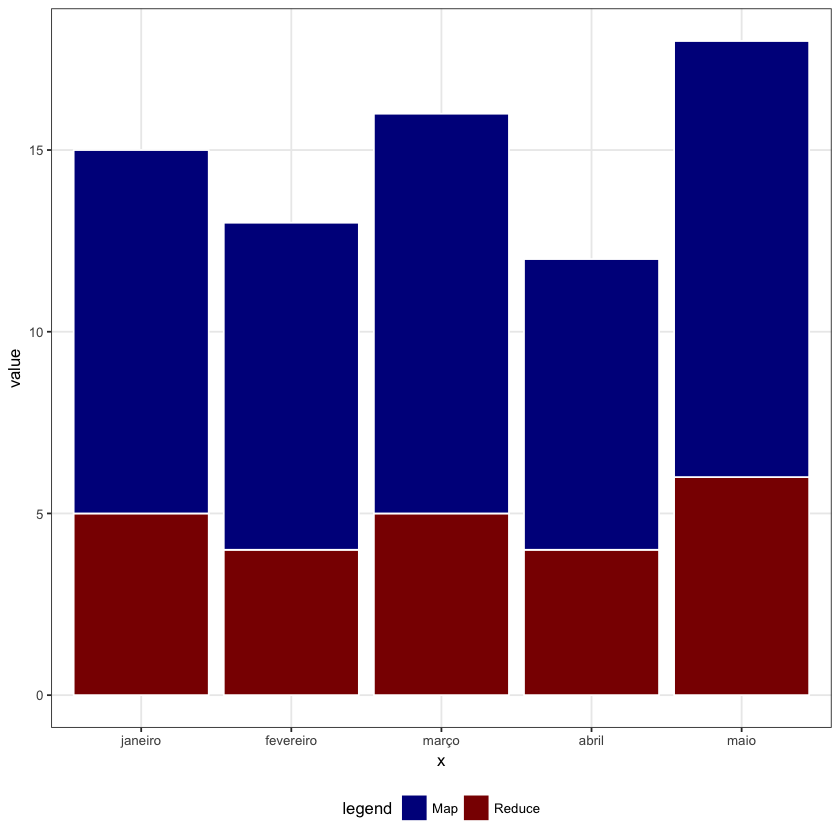

In [89]:
series <- dataset_stackedbar()
grf <- plot.stackedbar(series, colors=mycolors)
grf


Estas rotinas gerais fornecem uma padronização inicial que pode ser personalizada.  

O exemplo a seguir, redefine ou especifica formatações adicionais aos gráficos. 

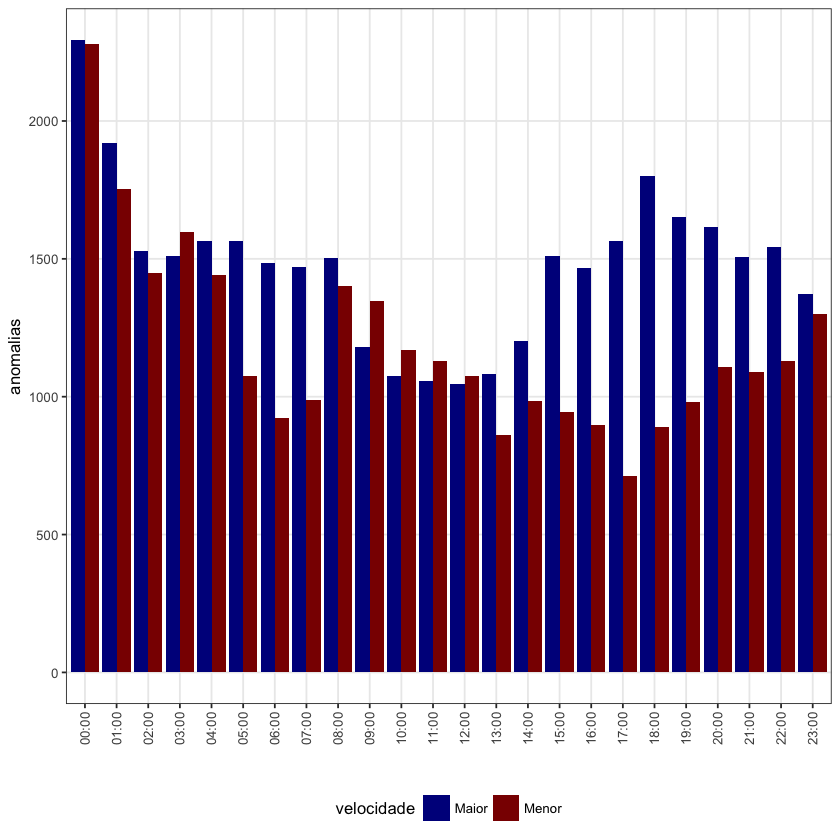

In [90]:
con <- url("https://github.com/eogasawara/mylibrary/raw/master/anomalies.RData")
load(con)

grf <- plot.bar(anomalies, group=TRUE, colors=mycolors)
grf <- grf + xlab("")
grf <- grf + guides(fill=guide_legend(title="velocidade"))
grf <- grf + ylab("anomalias")
grf <- grf + theme(axis.text.x = element_text(angle=90, vjust=0.5))
grf 



Produção de gráficos multi-face. O dataset precisa ter os seguintes atributos: $x$ (eixo x), $variable$ (colunas), $value$ (valores) e $face$ (agrupamento). 

O dataset $meses$ disponibilizado no GitHub tem os metadados necessários para a produção deste gráfico. 

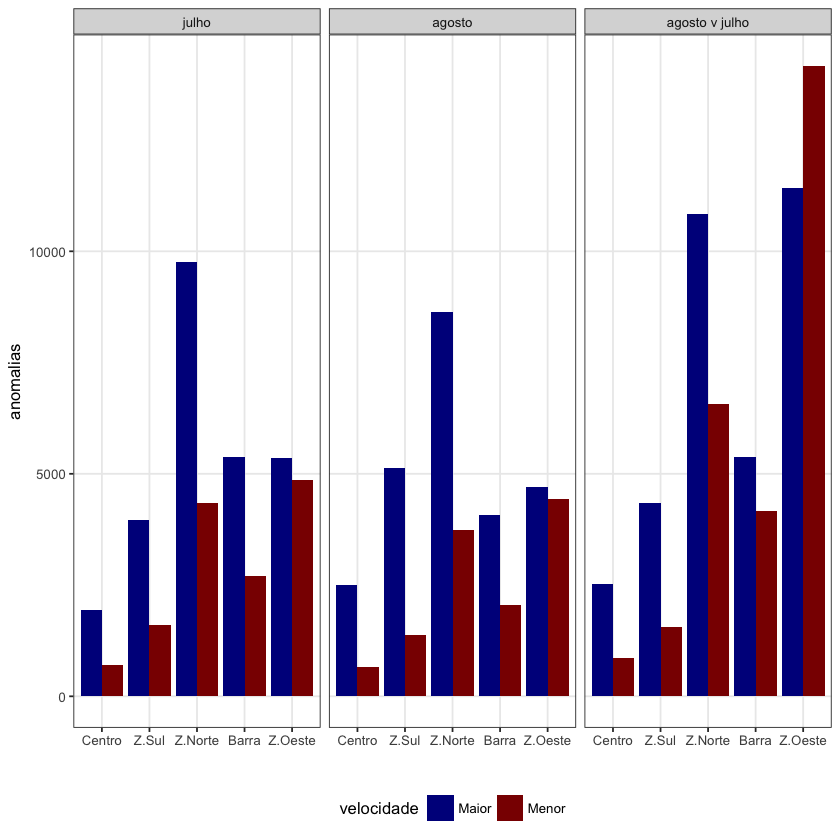

In [91]:
con <- url("https://github.com/eogasawara/mylibrary/raw/master/meses.RData")
load(con)

grf <- plot.bar(meses, group=TRUE, colors=mycolors)
grf <- grf + xlab("")
grf <- grf + guides(fill=guide_legend(title="velocidade"))
grf <- grf + ylab("anomalias")
grf <- grf + facet_wrap(~face, ncol = 3) 
grf 


Armazenamento do gráfico produzido em PDF

In [92]:
ggsave( "myplot.pdf", width = 5.5, height = 4)